In [43]:
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

In [44]:
# D = 8
D = 100
# N = 30 # this is one less than the JS parameter
N = 100 # this is one less than the JS parameter

dice_values = np.arange(D, dtype=float) +1
payoffs = np.zeros((N, D), dtype=float)
decisions = np.zeros((N, D), dtype=np.int8)

In [45]:
payoffs[N -1, :] = dice_values
decisions[N -1, :] = True

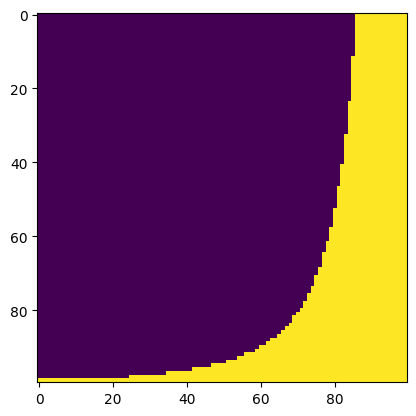

In [46]:
payoffs[N -1, :] = dice_values
decisions[N -1, :] = True
for idx in range(N -2, 0 -1, -1):
    roll_value = 0 +payoffs[idx +1, :].mean()
    take_value = dice_values +payoffs[idx +1, :]
    
    payoffs[idx, :] = np.maximum(take_value, roll_value)
    decisions[idx] = take_value >= roll_value # True = take profit
plt.imshow(decisions)

In [47]:
payoffs.mean(axis=1)

array([8776.2894502 , 8682.89470954, 8589.51710411, 8496.15942339,
       8402.82491092, 8309.51733827, 8216.24109102, 8123.00126862,
       8029.80380072, 7936.65558224, 7843.56463051, 7750.54026803,
       7657.59333492, 7564.69804109, 7471.82122481, 7378.96614683,
       7286.13664333, 7193.33722745, 7100.57320876, 7007.85083384,
       6915.17745158, 6822.56170774, 6730.01377381, 6637.54561624,
       6545.17131323, 6452.82299194, 6360.50356183, 6268.21852599,
       6175.9744357 , 6083.77909012, 5991.64177395, 5899.57354042,
       5807.58754812, 5715.69946204, 5623.87886993, 5532.09502402,
       5440.35545062, 5348.66921762, 5257.04725014, 5165.50271101,
       5074.05145905, 4982.71260126, 4891.44219666, 4800.22219105,
       4709.06364763, 4617.98005808, 4526.98787571, 4436.1071655 ,
       4345.35452531, 4254.65990778, 4164.03692319, 4073.50237431,
       3983.07700532, 3892.78642632, 3802.6080329 , 3712.51004113,
       3622.51255141, 3532.64068926, 3442.92586157, 3353.32387

In [49]:
NSIM = 50_000_000

jane_profits = np.zeros((NSIM,))
my_profits = np.zeros((NSIM,))

ex_gup = lambda k: ((N -(D/k)) * (D*2 -k +1)/2)
JANE_LB = D -np.argmax([ex_gup(k) for k in range(1, D +1)])
JANE_LB, ex_gup(D -JANE_LB +1), payoffs[0, 0]

(87, 8682.142857142857, 8682.89470953715)

In [63]:
payoffs[0, 0] -ex_gup(D -JANE_LB +1)

0.7518523942926549

In [50]:
# current_k = np.random.randint(low=1, high=D +1, size=(NSIM,))
current_k = np.ones((NSIM,), dtype=int)
for idx in tqdm(range(0, N)):
    # if 1, take
    my_decision = decisions[idx, :][current_k -1]

    my_profits += my_decision * current_k
    current_k = (1 -my_decision) * np.random.randint(low=1, high=D +1, size=(NSIM,)) +(my_decision * current_k)

# current_k = np.random.randint(low=1, high=D +1, size=(NSIM,))
current_k = np.ones((NSIM,), dtype=int)
for idx in tqdm(range(0, N)):
    # if 1, take
    jane_decision = (current_k >= JANE_LB)
    
    jane_profits += jane_decision * current_k
    current_k = (1 -jane_decision) * np.random.randint(low=1, high=D +1, size=(NSIM,)) +(jane_decision * current_k)

jane_profits.mean(), my_profits.mean(), jane_profits.mean() < my_profits.mean()

100%|██████████| 100/100 [01:03<00:00,  1.58it/s]


(8682.26968066, 8682.92764396, True)

In [64]:
my_profits.mean() -jane_profits.mean()

0.6579633000001195

[   -1900     -400    -1300    -2200    -3200    -2400    -4500    -5400
    -5900   -11700   -11600   -17400   -26300   -35400   -45900   -64400
   -82100  -104900  -138800  -177300  -240200  -249300  -331600  -363600
  -522300  -572600  -484400  -472800  -926500  -433900  -749400  2053000
 -1786500 -1423200  3059600  2749400  5721800 11113700 -5234500 -4232400
 -2866300 -1485800  -501500  -531400  -696800  -155200    19100   227100
    59500]


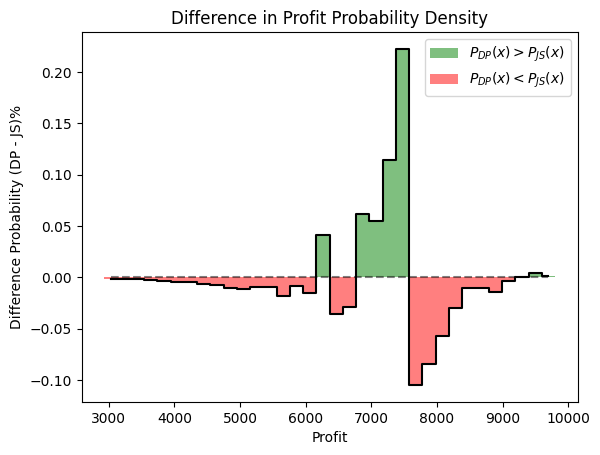

In [67]:
NBIN = 50
all_min, all_max = min(jane_profits.min(), my_profits.min()), max(jane_profits.max(), my_profits.max())

bins = np.linspace(all_min, all_max, num=NBIN)
jane_counts, _ = np.histogram(jane_profits, bins=bins)
my_counts, _ = np.histogram(my_profits, bins=bins)

diff_histogram = (my_counts -jane_counts)*100
print(F"{diff_histogram}")
SKIP = 15
plt.step(bins[:-1][SKIP:], diff_histogram[SKIP:]/my_counts.sum(), where="mid", color="black")
plt.bar(bins[:-1][SKIP:], np.maximum(0, diff_histogram[SKIP:]/my_counts.sum()), width=bins[1] -bins[0], color="green", alpha=0.5, label="$P_{DP}(x) > P_{JS}(x)$")
plt.bar(bins[:-1][SKIP:], np.minimum(0, diff_histogram[SKIP:]/my_counts.sum()), width=bins[1] -bins[0], color="red", alpha=0.5, label="$P_{DP}(x) < P_{JS}(x)$")
plt.hlines(0, bins[:-1][SKIP:][0], bins[:-1][SKIP:][-1], color="black", linestyle="--", alpha=0.5)

js_expected, my_expected = ex_gup(D -JANE_LB +1), payoffs[0, 0]

plt.legend()
plt.xlabel("Profit")
plt.ylabel("Difference Probability (DP - JS)%")
plt.title("Difference in Profit Probability Density")
plt.savefig("diff_histogram.png")